In [106]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import copy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

In [107]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
#checking for NA values
pod_user_data.isna().sum()

Age                            0
Gender                         0
spotify_usage_period           0
spotify_listening_device       0
spotify_subscription_plan      0
premium_sub_willingness        0
preffered_premium_plan         0
preferred_listening_content    0
pod_lis_frequency              0
fav_pod_genre                  0
preffered_pod_format           0
pod_host_preference            0
preffered_pod_duration         0
pod_variety_satisfaction       0
dtype: int64

In [110]:
user_data=pd.read_csv('/Users/christina/Desktop/Data Career/User_Behavior/Spotify_User_Behavior.csv')
pod_user_data = pd.concat([user_data.iloc[:, :8], user_data.iloc[:, -6:]],axis=1)
pod_user_data.describe()

category_mask= pod_user_data.dtypes==object
category_columns = pod_user_data.columns[category_mask].tolist()
#one hot decoding (label encoder)
pod_user_data_oh=pd.DataFrame()
label_mappings = {}
for col in category_columns:
    le = LabelEncoder()
    pod_user_data_oh[col] = le.fit_transform(pod_user_data[col])
    label_mappings[col] = dict(zip(le.classes_, range(len(le.classes_))))
#label_mappings

In [111]:
print(category_columns)

['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device', 'spotify_subscription_plan', 'premium_sub_willingness', 'preffered_premium_plan', 'preferred_listening_content', 'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction']


In [112]:
label_mappings['pod_variety_satisfaction']

{'Dissatisfied': 0,
 'Ok': 1,
 'Satisfied': 2,
 'Very Dissatisfied': 3,
 'Very Satisfied': 4}

In [113]:
from sklearn.feature_extraction import DictVectorizer

In [114]:
pod_user_data_dict = pod_user_data.to_dict("records")
dv = DictVectorizer(sparse=False)
pod_user_data_dict_encoded = dv.fit_transform(pod_user_data_dict)

In [115]:
# Print the resulting first five rows
pod_user_data_dict_encoded

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [116]:
#print(dv.vocabulary_)

# Model Selection

In [121]:
X= pod_user_data_oh.drop("pod_variety_satisfaction", axis=1).values
y= pod_user_data_oh["pod_variety_satisfaction"].values

In [122]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=42, stratify=y)

In [123]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [124]:
models={
  "Logistic Regression": LogisticRegression(), 
  "KNN": KNeighborsClassifier(),
  "Decision Tree": DecisionTreeClassifier()
}
training_result=[]

for model in models.values():
    kf= KFold(n_splits=5, random_state=42, shuffle=True)
    cv_result=cross_val_score(model, X_train, y_train, cv=kf)
    training_result.append(cv_result)

/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

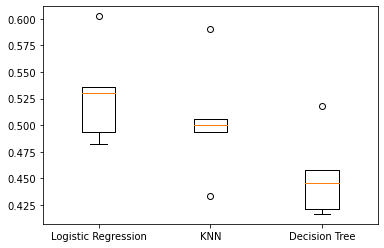

In [125]:
plt.boxplot(training_result, labels=models.keys())
plt.show()

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


In [127]:
logreg = LogisticRegression()
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
logreg.fit(X_train, y_train)  # Fit the model to the training data
pred = logreg.predict(X_test)
print(logreg.score(X_test, y_test))  # Compute accuracy using the test data

0.5192307692307693


/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [129]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  2  2  0  0]
 [ 0 43 13  0  0]
 [ 0 19 11  0  2]
 [ 0  2  0  0  0]
 [ 0  4  6  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.61      0.77      0.68        56
           2       0.34      0.34      0.34        32
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10

    accuracy                           0.52       104
   macro avg       0.19      0.22      0.21       104
weighted avg       0.44      0.52      0.47       104



/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/christina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
from sklearn.metrics import mean_squared_error

In [131]:
# Compute RMSE
r_squared = logreg.score(X_test, y_test)
rmse = mean_squared_error(y_test, pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.5192307692307693
RMSE: 1.0651832633943252


# XGBoosts

In [133]:
import xgboost as xgb

In [202]:
#optimal data structure created by XGB- DMatrix
pod_dmatrix= xgb.DMatrix(data= X,label= y)
#create cross validation parameters dict
param= {"objective": "multi:softmax", 
        "max_depth":10, 
        "num_class": len(set(y))}
#call cross validation
# Call cross-validation
cv_results = xgb.cv(
    dtrain=pod_dmatrix,
    params=param,
    nfold=10,  # Number of validation folds
    num_boost_round=100,  # Number of trees we want to build
    metrics="merror",  # The metric we want to compute (multi-class error rate)
    as_pandas=True  # Output stored as pd.DataFrame
)

# Print Accuracy
accuracy = 1 - cv_results["test-merror-mean"].iloc[-1]
print("Accuracy: %f" % accuracy)

Accuracy: 0.480769


## PCA

In [142]:
from sklearn.decomposition import PCA

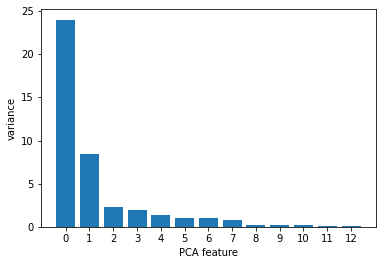

In [144]:
pca= PCA()
pca.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [208]:
#elbow
n_component=7
pca = PCA(n_components=n_component)
X_pca = pca.fit_transform(X)

In [163]:
names=pod_user_data_oh.drop("pod_variety_satisfaction", axis=1).columns.tolist()

In [219]:
pod_user_data.describe()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,5,3,4,15,2,2,5,2,5,20,5,4,4,5
top,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,None,Music,Rarely,None,Story telling,Both,Shorter,Ok
freq,422,391,169,300,424,334,208,410,201,148,152,180,191,280


## Feature Selection

In [ ]:
from sklearn.linear_model import Lasso

0.001 [-8.18936053e-02  1.60581710e-01  8.01580638e-03  7.37069570e-03
  1.39607329e-01  2.80068205e-01  5.27065965e-02  8.15062945e-02
  7.99521828e-02 -1.97244168e-02 -3.84472514e-02  1.63679579e-04
  7.45932818e-03]


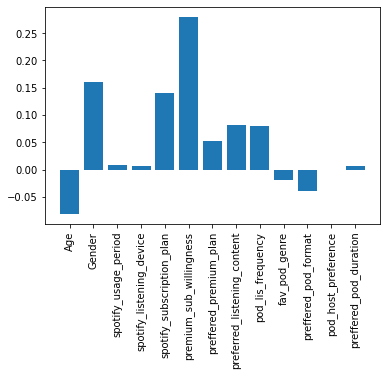

0.01 [-0.04329584  0.1277265   0.00076959  0.00351189  0.08827515  0.25487051
  0.03778877  0.01135186  0.07710017 -0.0192276  -0.0341402  -0.
 -0.        ]


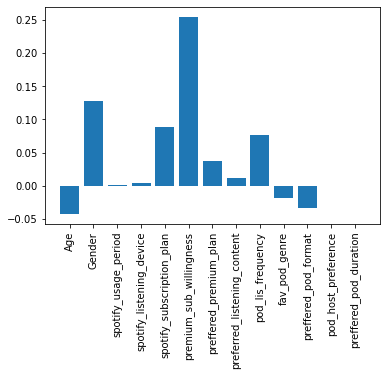

0.1 [-0.          0.          0.         -0.          0.          0.
 -0.          0.          0.0139107  -0.01760715 -0.          0.
 -0.        ]


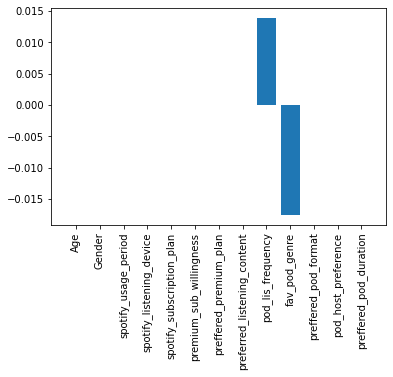

1.0 [-0.  0.  0. -0.  0.  0. -0.  0.  0. -0. -0. -0. -0.]


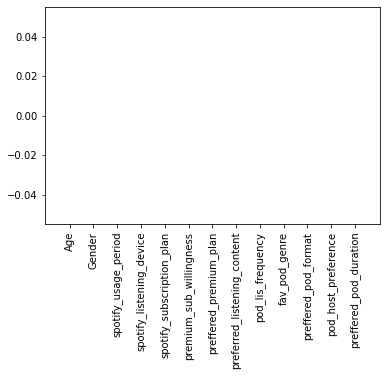

In [172]:
alphas = [0.001, 0.01, 0.1, 1.0]
ridge_scores = []
for alpha in alphas:
    lasso= Lasso(alpha=alpha)
    lasso_coef= lasso.fit(X,y).coef_
    print(alpha, lasso_coef)
    plt.bar(names, lasso_coef)
    plt.xticks(rotation=90)
    plt.show()

In [250]:
dropping_cols=['spotify_usage_period','spotify_listening_device','pod_host_preference','preffered_pod_duration',"pod_variety_satisfaction"]
selecting_cols=['pod_lis_frequency', 'fav_pod_genre']

In [230]:
#try1
X_selected= pod_user_data_oh.drop(dropping_cols, axis=1).values
y= pod_user_data_oh["pod_variety_satisfaction"].values

In [253]:
#try2
X_selected_2features= pod_user_data_oh[selecting_cols].values
y= pod_user_data_oh["pod_variety_satisfaction"].values

### Try1

In [232]:
#elbow
n_component=7
pca = PCA(n_components=n_component)
X_pca_selected = pca.fit_transform(X_selected)

In [233]:
# Train XGBoost model with PCA-transformed features
pod_dmatrix = xgb.DMatrix(data=X_pca_selected, label=y)
param = {
    "objective": "multi:softmax",
    "max_depth": 4,
    "num_class": len(set(y))
}
rmses_l1=[]
l1_param = [0.001, 0.01, 0.1, 1.0]
for alpha in l1_param:
    param['alpha']= alpha 
    cv_results = xgb.cv(
        dtrain=pod_dmatrix,
        params=param,
        nfold=4,
        num_boost_round=10,
        metrics="merror",
        as_pandas=True
    )
    rmses_l1.append(cv_results["test-merror-mean"].tail().values[0])

# Print accuracy
accuracy = 1 - cv_results["test-merror-mean"].iloc[-1]
print("Accuracy with PCA: %f" % accuracy)

# Train XGBoost model with ridge regularization
# Use the original feature matrix X or apply PCA if desired


Accuracy with PCA: 0.513462


In [234]:
X_train, X_test, y_train, y_test= train_test_split(X_pca_selected,y, test_size= 0.2, random_state=42, stratify=y)

### Try2

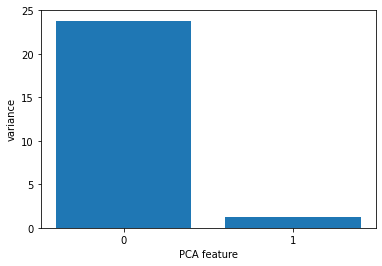

In [256]:
pca= PCA()
pca.fit(X_selected_2features)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()
X_train, X_test, y_train, y_test= train_test_split(X_selected_2features,y, test_size= 0.2, random_state=42, stratify=y)

In [257]:
#elbow
pca = PCA(n_components=2)
X_pca_selected_2 = pca.fit_transform(X_selected_2features)

In [258]:
# Train XGBoost model with PCA-transformed features
pod_dmatrix = xgb.DMatrix(data=X_pca_selected_2, label=y)
param = {
    "objective": "multi:softmax",
    "max_depth": 4,
    "num_class": len(set(y))
}
rmses_l1=[]
l1_param = [0.001, 0.01, 0.1, 1.0]
for alpha in l1_param:
    param['alpha']= alpha 
    cv_results = xgb.cv(
        dtrain=pod_dmatrix,
        params=param,
        nfold=4,
        num_boost_round=10,
        metrics="merror",
        as_pandas=True
    )
    rmses_l1.append(cv_results["test-merror-mean"].tail().values[0])

# Print accuracy
accuracy = 1 - cv_results["test-merror-mean"].iloc[-1]
print("Accuracy with PCA: %f" % accuracy)

# Train XGBoost model with ridge regularization
# Use the original feature matrix X or apply PCA if desired


Accuracy with PCA: 0.538462


In [259]:

# 假設X_pca和y已經準備好並處理過
pod_dmatrix = xgb.DMatrix(data=X_pca_selected_2, label=y)
param = {
    "objective": "multi:softmax",
    "max_depth": 10,
    "num_class": len(set(y)),
    "alpha": 0.1  # 初始設置，可根據需求調整
}

# 擴展參數列表以包括eta和subsample
etas = [0.01, 0.1, 0.2]
subs = [0.5, 0.75, 1]

best_params = None
min_error = float("inf")  # 初始化最小錯誤率為無限大
for eta in etas:
    for sub in subs:
        param['eta'] = eta
        param['subsample'] = sub
        cv_results = xgb.cv(
            dtrain=pod_dmatrix,
            params=param,
            nfold=4,
            num_boost_round=100,  # 增加迭代次數以觀察長期表現
            metrics="merror",
            as_pandas=True,
            early_stopping_rounds=10  # 添加早停以防過擬合
        )
        mean_merror = cv_results["test-merror-mean"].min()
        if mean_merror < min_error:
            min_error = mean_merror
            best_params = (eta, sub)

# 最優化的參數
print(f"Best Params:\nETA: {best_params[0]}, Subsample: {best_params[1]}")
print(f"Lowest Mean MError: {min_error}")

# 計算並列印最佳參數下的準確率
accuracy = 1 - min_error
print(f"Accuracy with PCA and Optimized Params: {accuracy}")


Best Params:
ETA: 0.2, Subsample: 0.75
Lowest Mean MError: 0.4442307692307692
Accuracy with PCA and Optimized Params: 0.5557692307692308


In [260]:
model= xgb.XGBClassifier()
model.fit(X_train, y_train)
pred= model.predict(X_test)

In [261]:
kfold= KFold(n_splits=5, random_state=42, shuffle=True)
results=cross_val_score(model, X_pca_selected_2, y, cv=kfold)
print(results.mean())

0.5153846153846153


In [262]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, pred)

In [263]:
accuracy

0.5769230769230769

### Hyper parameter Tuning

In [235]:

# 假設X_pca和y已經準備好並處理過
pod_dmatrix = xgb.DMatrix(data=X_pca, label=y)
param = {
    "objective": "multi:softmax",
    "max_depth": 10,
    "num_class": len(set(y)),
    "alpha": 0.1  # 初始設置，可根據需求調整
}

# 擴展參數列表以包括eta和subsample
etas = [0.01, 0.1, 0.2]
subs = [0.5, 0.75, 1]

best_params = None
min_error = float("inf")  # 初始化最小錯誤率為無限大
for eta in etas:
    for sub in subs:
        param['eta'] = eta
        param['subsample'] = sub
        cv_results = xgb.cv(
            dtrain=pod_dmatrix,
            params=param,
            nfold=4,
            num_boost_round=100,  # 增加迭代次數以觀察長期表現
            metrics="merror",
            as_pandas=True,
            early_stopping_rounds=10  # 添加早停以防過擬合
        )
        mean_merror = cv_results["test-merror-mean"].min()
        if mean_merror < min_error:
            min_error = mean_merror
            best_params = (eta, sub)

# 最優化的參數
print(f"Best Params:\nETA: {best_params[0]}, Subsample: {best_params[1]}")
print(f"Lowest Mean MError: {min_error}")

# 計算並列印最佳參數下的準確率
accuracy = 1 - min_error
print(f"Accuracy with PCA and Optimized Params: {accuracy}")


Best Params:
ETA: 0.01, Subsample: 0.5
Lowest Mean MError: 0.48269230769230764
Accuracy with PCA and Optimized Params: 0.5173076923076924


In [237]:
model= xgb.XGBClassifier()
model.fit(X_train, y_train)
pred= model.predict(X_test)

In [239]:
kfold= KFold(n_splits=5, random_state=42, shuffle=True)
results=cross_val_score(model, X_pca_selected, y, cv=kfold)
print(results.mean())

0.5173076923076924


In [189]:
kfold= KFold(n_splits=5, random_state=42, shuffle=True)
results=cross_val_score(model, X_pca, y, cv=kfold)
print(results.mean())

0.4461538461538462


In [240]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, pred)

In [242]:
accuracy #no over-fitting generalizability preserved

0.5576923076923077

In [188]:
accuracy

0.4230769230769231

## Feature Selections